# Clustering - Crime Data

## Hierarchical Clustering

In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [3]:
crime_data = pd.read_csv("Crime_data.csv")
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime_data.iloc[:,1:])

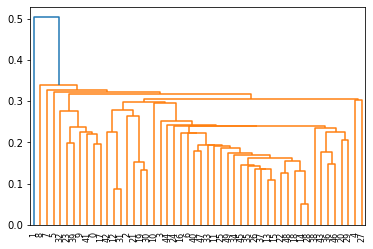

In [6]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [7]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [8]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [9]:
crime_data['h_clusterid'] = hc.labels_

In [10]:
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [11]:
Clusters

,Clusters
0,0
1,3
2,0
3,0
4,0
5,0
6,0
7,1
8,2
9,0


# K-Means

In [12]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_data_df = scaler.fit_transform(crime_data.iloc[:,1:])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

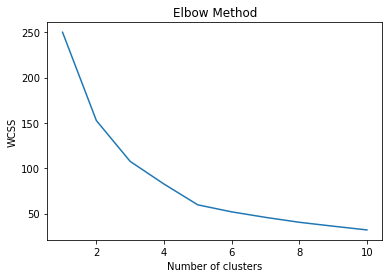

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_data_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
#Build Cluster algorithm
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_crime_data_df)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [15]:
clusters_new.labels_

array([3, 2, 3, 1, 3, 3, 0, 0, 2, 3, 0, 1, 3, 0, 1, 0, 1, 3, 1, 3, 0, 3,
       1, 3, 3, 1, 1, 3, 1, 0, 3, 3, 3, 1, 0, 0, 0, 0, 0, 3, 1, 3, 3, 0,
       1, 0, 0, 1, 1, 0])

In [16]:
crime_data['clusterid_new'] = clusters_new.labels_

In [17]:
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024, -0.11157164],
       [-0.88515915, -1.0213324 , -0.94990286, -0.92016524, -0.23284516],
       [ 1.13921666,  1.55442283, -0.10747222,  1.82997701,  4.61809563],
       [ 1.00135001,  0.96519777,  0.23370943,  0.74729574, -0.23284516]])

In [18]:
crime_data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250,0.0625
1,1,3.971429,86.500000,51.928571,12.700000,0.0000
2,2,12.700000,299.000000,64.000000,38.200000,2.5000
3,3,12.105556,250.388889,68.888889,28.161111,0.0000


In [19]:
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
0,Alabama,13.2,236,58,21.2,0,3
1,Alaska,10.0,263,48,44.5,3,2
2,Arizona,8.1,294,80,31.0,0,3
3,Arkansas,8.8,190,50,19.5,0,1
4,California,9.0,276,91,40.6,0,3
5,Colorado,7.9,204,78,38.7,0,3
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,2,2
9,Georgia,17.4,211,60,25.8,0,3


# DBSCAN

In [20]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [22]:
crimedata = pd.read_csv("Crime_data.csv")
crimedata.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [23]:
df = crime_data.iloc[:,1:]
array = df.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   0. ,   3. ],
       [ 10. , 263. ,  48. ,  44.5,   3. ,   2. ],
       [  8.1, 294. ,  80. ,  31. ,   0. ,   3. ],
       [  8.8, 190. ,  50. ,  19.5,   0. ,   1. ],
       [  9. , 276. ,  91. ,  40.6,   0. ,   3. ],
       [  7.9, 204. ,  78. ,  38.7,   0. ,   3. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ,   0. ],
       [  5.9, 238. ,  72. ,  15.8,   1. ,   0. ],
       [ 15.4, 335. ,  80. ,  31.9,   2. ,   2. ],
       [ 17.4, 211. ,  60. ,  25.8,   0. ,   3. ],
       [  5.3,  46. ,  83. ,  20.2,   0. ,   0. ],
       [  2.6, 120. ,  54. ,  14.2,   0. ,   1. ],
       [ 10.4, 249. ,  83. ,  24. ,   0. ,   3. ],
       [  7.2, 113. ,  65. ,  21. ,   0. ,   0. ],
       [  2.2,  56. ,  57. ,  11.3,   0. ,   1. ],
       [  6. , 115. ,  66. ,  18. ,   0. ,   0. ],
       [  9.7, 109. ,  52. ,  16.3,   0. ,   1. ],
       [ 15.4, 249. ,  66. ,  22.2,   0. ,   3. ],
       [  2.1,  83. ,  51. ,   7.8,   0. ,   1. ],
       [ 11.3, 300. ,  67. ,  2

In [25]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[ 1.25517927e+00,  7.90787158e-01, -5.26195142e-01,
        -3.45115891e-03, -2.32845158e-01,  1.23082909e+00],
       [ 5.13018579e-01,  1.11805959e+00, -1.22406668e+00,
         2.50942392e+00,  5.58828379e+00,  4.41836082e-01],
       [ 7.23606675e-02,  1.49381682e+00,  1.00912225e+00,
         1.05346626e+00, -2.32845158e-01,  1.23082909e+00],
       [ 2.34708319e-01,  2.33211909e-01, -1.08449238e+00,
        -1.86793976e-01, -2.32845158e-01, -3.47156922e-01],
       [ 2.81093362e-01,  1.27563520e+00,  1.77678094e+00,
         2.08881393e+00, -2.32845158e-01,  1.23082909e+00],
       [ 2.59756242e-02,  4.02908724e-01,  8.69547941e-01,
         1.88390137e+00, -2.32845158e-01,  1.23082909e+00],
       [-1.04088037e+00, -7.36484178e-01,  7.99760786e-01,
        -1.09272319e+00, -2.32845158e-01, -1.13614993e+00],
       [-4.37874809e-01,  8.15029561e-01,  4.50825016e-01,
        -5.85834225e-01,  1.70753116e+00, -1.13614993e+00],
       [ 1.76541475e+00,  1.99078607e+00,  1.009

In [26]:
dbscan = DBSCAN(eps=0.8, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=4)

In [27]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  0,  1,  0, -1,
       -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,
        0,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1, -1,  1,  0],
      dtype=int64)

In [30]:
cluster=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [31]:
cluster

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [33]:
pd.concat([df,cluster],axis=1)

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new,cluster
0,13.2,236,58,21.2,0,3,-1
1,10.0,263,48,44.5,3,2,-1
2,8.1,294,80,31.0,0,3,-1
3,8.8,190,50,19.5,0,1,-1
4,9.0,276,91,40.6,0,3,-1
5,7.9,204,78,38.7,0,3,-1
6,3.3,110,77,11.1,0,0,-1
7,5.9,238,72,15.8,1,0,-1
8,15.4,335,80,31.9,2,2,-1
9,17.4,211,60,25.8,0,3,-1
